逻辑回归
1. 实质是基于回归的分类 分成两个类别的二分类
2. (如果只能用二分类的话是不是不如贝叶斯) 但是如果你会python的话也可以用来解决多分类问题
3. 主要思想是将线性组合的特征值通过一个逻辑函数（也称为sigmoid函数）映射到0和1之间的概率值
4. sigmoid函数
   $$
    \sigma(z) = \frac{1}{1 + e^{-z}}
    $$


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#加载数据集
from sklearn.datasets import load_breast_cancer
import pandas as pd

# 明确什么是特征数据 什么是目标数据
# 从乳腺癌数据集中获取特征数据并创建DataFrame
features = pd.DataFrame(load_breast_cancer().data, 
                        columns=load_breast_cancer().feature_names)
# 获取标签数据并创建DataFrame，标签代表是否患有乳腺癌（0表示恶性，1表示良性）
label = pd.DataFrame(load_breast_cancer().target, 
                     columns=['class'])
# 将特征数据和标签数据合并成一个数据集
data = pd.concat([features, label], axis=1)


path = 'data.csv'
data.to_csv(path,index = False)#不输出索引值
# 读入文件
mydata = pd.read_csv(path)

# 提取 'class' 列中的数据
cls=mydata['class']

# 使用列表推导式为 'class' 列创建 'label' 列
# class是原分类 label是打上去的标签 
label = [0 if i == 0 else 1 for i in cls]  # 列表推导式，如果 'class' 是 'Benign'，则标签为0，否则为1

# 将 'label' 列添加到 mydata 中
mydata['label'] = label

# 在sklearn中0、1标签已经打好，但是在真实场景中不会有这种虚拟标签，而是具有实际意义的类别。因此，我们需要手动替换class列的0为Benign，替换1为Malignant。

In [27]:
# 导入 train_test_split 函数
from sklearn.model_selection import train_test_split

# 从 mydata 中获取特征矩阵 x 和目标向量 y
x = mydata.copy().drop(columns=['class', 'label'])  # 特征矩阵 x 包含除 'class' 和 'label' 列之外的所有特征
y = mydata['label']  # 目标向量 y 包含 'label' 列的数据

# 划分数据集为训练集和测试集，测试集占比为20%，同时设置随机种子 random_state 为0以确保结果可重复
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [28]:
# 导入逻辑回归模型
from sklearn.linear_model import LogisticRegression

# 实例化逻辑回归模型
LR = LogisticRegression()

# 使用训练数据 x_train 和 y_train 拟合模型
LR.fit(x_train.values, y_train.ravel())

# 查看拟合后的模型参数
# 截距项
a = LR.intercept_
# 自变量 x1~xn 的系数
b = LR.coef_

# 导入 NumPy 库
import numpy as np

# 打印截距项和系数，使用 np.round 函数将参数值保留两位小数
print(np.round(a, 2))
print(np.round(b, 2))


[0.3]
[[ 1.53  0.29  0.06 -0.   -0.06 -0.29 -0.39 -0.16 -0.11 -0.02  0.08  0.61
   0.4  -0.13 -0.   -0.06 -0.09 -0.02 -0.02 -0.01  1.67 -0.4  -0.24 -0.02
  -0.11 -0.93 -1.17 -0.33 -0.32 -0.09]]


g:\anaconda\envs\sksklearn\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


则根据上述截距a  系数b  得出  逻辑回归中的最终表达式
$$
y = \frac{1}{a + e^{-(0.31 + 1.54X_1 + 0.30X_2 + 0.06X_3 + \ldots - 0.10X_{30})}}
$$

In [29]:
prediction = LR.predict(x_test.values)#对测试集进行预测
print(prediction)

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]


Text(0.5, 1.0, 'ROC Curve')

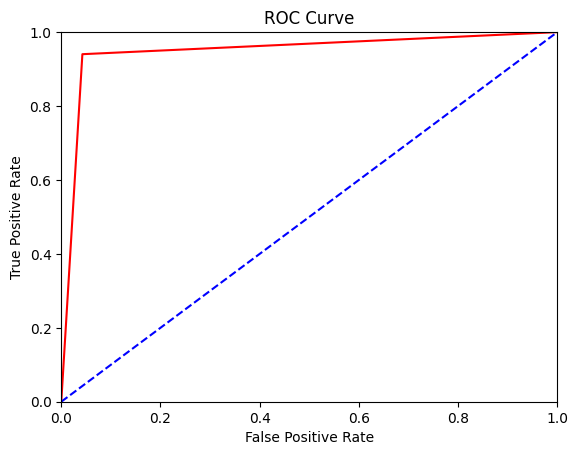

: 

In [30]:
# 只有对二分类问题才能绘制的roc曲线  越接近1效果越好
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test, prediction) #fpr为false positive rate，tpr为true positive rate

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='r') 
plt.plot([0, 1], [0, 1], color='blue',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')